In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 22
%matplotlib inline

In [2]:
def rolling_apply(fun, a, w):
    r = np.empty(a.shape)
    r.fill(0)
    for i in range(0, a.shape[0]):
        r[i] = fun(a[(i-w+1):i+1])
    return r

In [3]:
rewards_resnet = np.load('runs/resnet/results.npy')
#rewards_cnn = np.load('runs/cnn/results.npy')
#rewards_mlp = np.load('runs/mlp/results.npy')

reward_list = [rewards_resnet]
labels = ['Resnet']
#reward_list = [rewards_resnet, rewards_cnn, rewards_mlp]
#labels = ['Resnet', 'CNN-mlp', 'MLP']



In [11]:
np.mean(rewards_resnet[20000-100:20000]), np.std(rewards_resnet[20000-100:20000])

(108.5370513780876, 22.661542366405083)

In [11]:
#np.mean(rewards_cnn[12500-100:12500]), np.std(rewards_cnn[12500-100:12500])

In [6]:
np.mean(rewards_mlp[12500-100:12500]), np.std(rewards_mlp[12500-100:12500])

(nan, nan)

In [7]:
myopic = np.load('runs/myopic/rewards_test.npy')
#myopic

In [5]:

means = [rolling_apply(np.mean, r, 100) for r in reward_list]
t = np.arange(means[0].shape[0])

/home/users/aadeleye/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/users/aadeleye/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


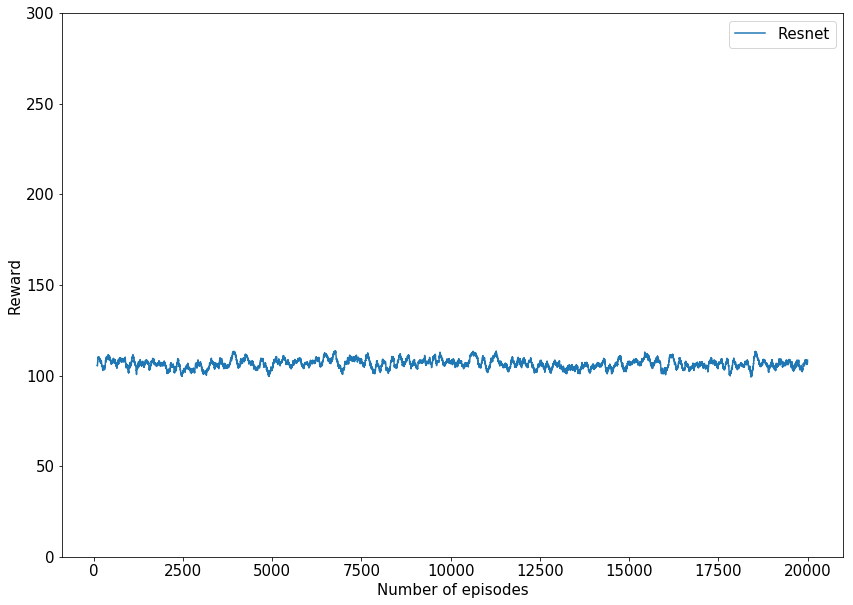

In [12]:
plt.figure(figsize=(14, 10))
ax = plt.subplot(111)
ax.set_xlabel('Number of episodes')
ax.set_ylabel('Reward')
for i in range(len(means)):
    ax.plot(np.arange(means[i].shape[0])[:20000], means[i][:20000], label=labels[i])
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.ylim(0, 300)
plt.legend(fontsize=15)
plt.savefig('paper/figs/learningcurve.pdf')

In [14]:
np.min(meanz)

NameError: name 'mean' is not defined